# Intro / Disclaimer

Initially I worked on another model. This model tried to detect faults in a district heating network using data from the company I work at.
However the data was breaking all reasonable values & the laws of physics so often that I had to throw away the project after working on it for two months.


This notebook covers data taken from this Kaggle dataset
https://www.kaggle.com/dansbecker/melbourne-housing-snapshot/data
We'll be using Imputation, mean normalization, random forest regression and a sequential deeplearning model.
The idea is to focus on the mean absolute error for our prediction to see how good our model can get at predicting housing prices.

As I spent so much time on my other model this will be a somewhat simple notebook. I hope that it measures up to what is required of the course. My other work took most of my motivation...

Now on to the code!

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
import tensorflow as tf

In [2]:
df = pd.read_csv("melb_data.csv")

# Lets begin our Data Cleansing & Data exploration.
### Notes on Specific Variables

Rooms: Number of rooms

Price: Price in dollars

Method: S - property sold; SP - property sold prior; PI - property passed in; PN - sold prior not disclosed; SN - sold not disclosed; NB - no bid; VB - vendor bid; W - withdrawn prior to auction; SA - sold after auction; SS - sold after auction price not disclosed. N/A - price or highest bid not available.

Type: br - bedroom(s); h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse; dev site - development site; o res - other residential.

SellerG: Real Estate Agent

Date: Date sold

Distance: Distance from CBD

Regionname: General Region (West, North West, North, North east …etc)

Propertycount: Number of properties that exist in the suburb.

Bedroom2 : Scraped # of Bedrooms (from different source)

Bathroom: Number of Bathrooms

Car: Number of carspots

Landsize: Land Size

BuildingArea: Building Size

CouncilArea: Governing council for the area

In [3]:
df # Looks liek we're in luck and most things are stored properly

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,...,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0


In [4]:
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


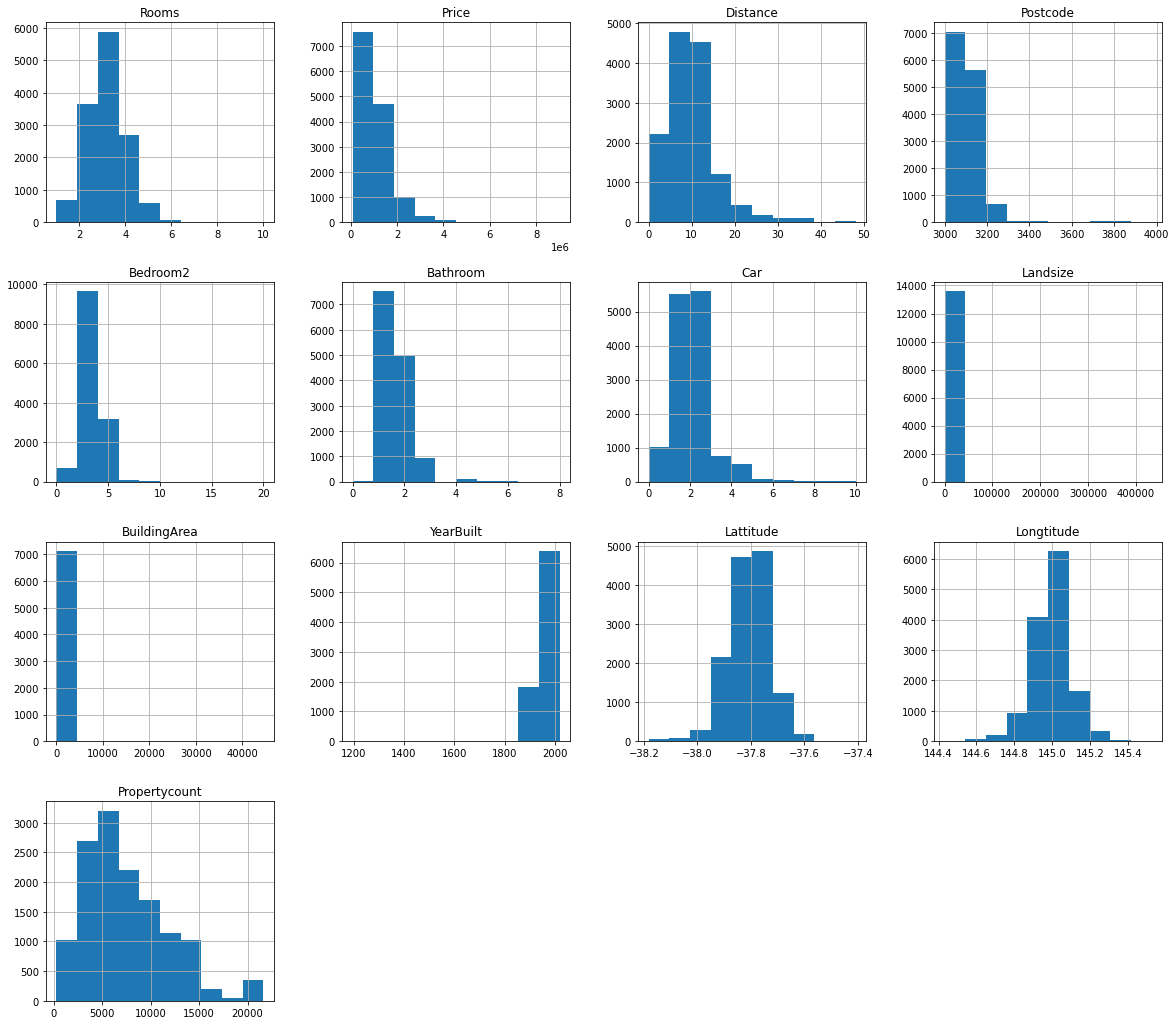

In [5]:
df.hist(figsize = (20,18));

## Looks like our data makes sense. We won't have to clean away improper values thankfully.
### Lets look at our dataframe info.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

### Other than the NaN values the Dtypes seem ok at a first glance.
### If we want we could change the object types to catagories. 
### Lets check for duplicates.

In [7]:
df[df.duplicated()]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount


### We are good! No duplicates!

### We already saw that we have some NaN values above but let's double check.

In [8]:
df.isnull().any()

Suburb           False
Address          False
Rooms            False
Type             False
Price            False
Method           False
SellerG          False
Date             False
Distance         False
Postcode         False
Bedroom2         False
Bathroom         False
Car               True
Landsize         False
BuildingArea      True
YearBuilt         True
CouncilArea       True
Lattitude        False
Longtitude       False
Regionname       False
Propertycount    False
dtype: bool

In [9]:
df.corr() # Lets explore the correlations in the dataframe. Only works for numeric value so we're not able to see everything.

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
Rooms,1.000000,0.496634,0.294203,0.055303,0.944190,0.592934,0.408483,0.025678,0.124127,-0.065413,0.015948,0.100771,-0.081530
Price,0.496634,1.000000,-0.162522,0.107867,0.475951,0.467038,0.238979,0.037507,0.090981,-0.323617,-0.212934,0.203656,-0.042153
Distance,0.294203,-0.162522,1.000000,0.431514,0.295927,0.127155,0.262994,0.025004,0.099481,0.246379,-0.130723,0.239425,-0.054910
Postcode,0.055303,0.107867,0.431514,1.000000,0.060584,0.113664,0.050289,0.024558,0.055475,0.032863,-0.406104,0.445357,0.062304
Bedroom2,0.944190,0.475951,0.295927,0.060584,1.000000,0.584685,0.405325,0.025646,0.122319,-0.053319,0.015925,0.102238,-0.081350
Bathroom,0.592934,0.467038,0.127155,0.113664,0.584685,1.000000,0.322246,0.037130,0.111933,0.152702,-0.070594,0.118971,-0.052201
Car,0.408483,0.238979,0.262994,0.050289,0.405325,0.322246,1.000000,0.026770,0.096101,0.104515,-0.001963,0.063395,-0.024295
Landsize,0.025678,0.037507,0.025004,0.024558,0.025646,0.037130,0.026770,1.000000,0.500485,0.036451,0.009695,0.010833,-0.006854
BuildingArea,0.124127,0.090981,0.099481,0.055475,0.122319,0.111933,0.096101,0.500485,1.000000,0.019665,0.043420,-0.023810,-0.028840
YearBuilt,-0.065413,-0.323617,0.246379,0.032863,-0.053319,0.152702,0.104515,0.036451,0.019665,1.000000,0.060445,-0.003470,0.006361


# Feature creation.

## Imputation
As we want to include the Car data into our final analysis we'll have to fill the NaN values in this column.
We also know from our df.info that we're "only" filling roughly 300 datapoints.
To do this we'll impute the mean value into our missing points.
## One-Hot-Encoding
An argument could be made that the type of realestate and sell method could be converted so that they're included in the dataset.
For this we won't be doing this however. Could be something for future work.
## Scaling/Normalizing/Centre
Since our data ranges quite a bit we'll normalize our data for later use.

In [10]:
# Imputation here. We saw the mean being 1.67. We'll round up to 2. 
df["Car"] = df["Car"].fillna(2.0)

In [11]:
# Lets use a mean normalization for the data we'll later be training on.
df_norm = df[["Rooms", "Postcode", "Bedroom2", "Bathroom", "Landsize", "Car", "Price"]]
normalized_df=(df_norm-df_norm.mean())/df_norm.std()

# Model Definition
In this notebook we'll first take a look at a random forest. 
This was selected as random forest is one of the most widely used machine learning algorithms in real production settings.
Another strength of Random forest is simplicity and high accuracy. It's also been reported to be used for similair purposes in the past.

The sequential solution was chosen as it can function well as a deep learning model for this type of regression problem.
It will also be intresting to see how it performs vs random forest.

https://github.com/IBM/skillsnetwork/blob/master/coursera_capstone/guidelines/Lightweight_IBM%20Cloud_Garage_Method_for_Data_Science_Model_Definition_Guidlines.pdf

# Model Deployment
The model will be deployed as a JutyperLab notebook so that stakeholders will can more easily access it. 

This was also chosen as it will not be used very much and I enjoy working in JupyterLab
https://github.com/IBM/skillsnetwork/blob/master/coursera_capstone/guidelines/Lightweight_IBM%20Cloud_Garage_Method_for_Data_Science_Model_Deployment_Guidlines.pdf

# We'll use MAE because we're looking at the cost of apartments.
When using the MAE, the error scales linearly. Therefore, an error of 10, is 10 times worse than an error of 1.
This is a usefull metric when the errors don't have to be punished too hard. We're not looking at something extreme like the heatpoint for an appliance. In such a case RMSE would be better as it more heavily punishes errors. This is good as we don't want the appliance to hardwire and create a chain effect where more things are affected.
https://github.com/IBM/skillsnetwork/blob/master/coursera_capstone/guidelines/Lightweight_IBM%20Cloud_Garage_Method_for_Data_Science_Model_Evaluation_Guidlines.pdf

# We start training and evaluating the model now!
https://github.com/IBM/skillsnetwork/blob/master/coursera_capstone/guidelines/Lightweight_IBM%20Cloud_Garage_Method_for_Data_Science_Model_Training_Guidlines.pdf

In [12]:
# Split into test & train data. X columns are specificed to switch out the used df easier.
X_train, X_test, y_train, y_test = train_test_split(normalized_df[["Rooms", "Postcode", "Bedroom2", "Bathroom", "Landsize", "Car"]], normalized_df["Price"], test_size=0.2, random_state = 0)

In [13]:
X_train.shape , y_train.shape , X_test.shape, y_test.shape

((10864, 6), (10864,), (2716, 6), (2716,))

In [14]:
model =  RandomForestRegressor(random_state=0, n_estimators = 100)
model.fit(X_train,y_train)
print(model.score(X_train,y_train))

0.9500460245962729


In [15]:
pred_price = model.predict(X_train)
mean_absolute_error(y_train, pred_price)

0.13500060699848745

# Our score is quite good!
But maybe we're overfitting the data? How does the test set do?

In [16]:
print(model.score(X_test,y_test))

0.7002437120281418


In [17]:
Eval_test = model.predict(X_test)
mean_absolute_error(y_test, Eval_test)

0.32668598055133585

### Not horrible but could be better.
# Lets move on to the sequential model

In [18]:
target = normalized_df.pop('Price')

In [19]:
dataset = tf.data.Dataset.from_tensor_slices((normalized_df.values, target.values))

In [20]:
for feat, targ in dataset.take(13580):
    ('Features: {}, Target: {}'.format(feat, targ))

In [21]:
tf.constant(df['Rooms'])

<tf.Tensor: shape=(13580,), dtype=int64, numpy=array([2, 2, 3, ..., 3, 4, 4], dtype=int64)>

In [22]:
train_dataset = dataset.shuffle(len(normalized_df)).batch(1)

In [23]:
def get_compiled_model():
  model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1)
  ])

  model.compile(optimizer='adam',
                loss=tf.keras.losses.MeanAbsoluteError(
                ))
  return model

In [24]:
model = get_compiled_model()
model.fit(train_dataset, epochs=15)

Epoch 1/15
13580/13580 [==============================] - 8s 576us/step - loss: 0.5683
Epoch 2/15
13580/13580 [==============================] - 9s 690us/step - loss: 0.5148
Epoch 3/15
13580/13580 [==============================] - 10s 760us/step - loss: 0.5162
Epoch 4/15
13580/13580 [==============================] - 10s 763us/step - loss: 0.5109
Epoch 5/15
13580/13580 [==============================] - 10s 761us/step - loss: 0.5140
Epoch 6/15
13580/13580 [==============================] - 10s 739us/step - loss: 0.5059
Epoch 7/15
13580/13580 [==============================] - 10s 755us/step - loss: 0.5063
Epoch 8/15
13580/13580 [==============================] - 10s 752us/step - loss: 0.4977
Epoch 9/15
13580/13580 [==============================] - 11s 779us/step - loss: 0.4972
Epoch 10/15
13580/13580 [==============================] - 11s 774us/step - loss: 0.5013
Epoch 11/15
13580/13580 [==============================] - 11s 776us/step - loss: 0.5070
Epoch 12/15
13580/13580 [=======

# Our sequential model is not performing well. 
Either we need more data or we maybe needed to include data such as type & method.
But that is something we'll work on another day.